## Project on Comcast Telecom Consumer Complaints.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### > Importing the base data file

In [2]:
df=pd.read_csv("/Comcast_telecom_complaints_data.csv")

In [3]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [5]:
df.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


- Changing the data type of column Date_month_year from object to datetime.

In [7]:
df['Date_month_year']= pd.to_datetime(df['Date_month_year'], format= '%d-%b-%y')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   object        
 3   Date_month_year              2224 non-null   datetime64[ns]
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
m

- Setting Date_month_year as Index.

In [9]:
df=df.set_index('Date_month_year')

In [10]:
df.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
Date_month_year,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-04-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
2015-08-04,223441,Payment disappear - service got disconnected,04-08-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2015-04-18,242732,Speed and Service,18-04-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
2015-07-05,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
2015-05-26,307175,Comcast not working and no service to boot,26-05-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


#### > Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [11]:
df['Customer Complaint'].resample('M').count()

Date_month_year
2015-01-31      55
2015-02-28      59
2015-03-31      45
2015-04-30     375
2015-05-31     317
2015-06-30    1046
2015-07-31      49
2015-08-31      67
2015-09-30      55
2015-10-31      53
2015-11-30      38
2015-12-31      65
Freq: M, Name: Customer Complaint, dtype: int64

Text(0, 0.5, 'Frequency of Customer Complain')

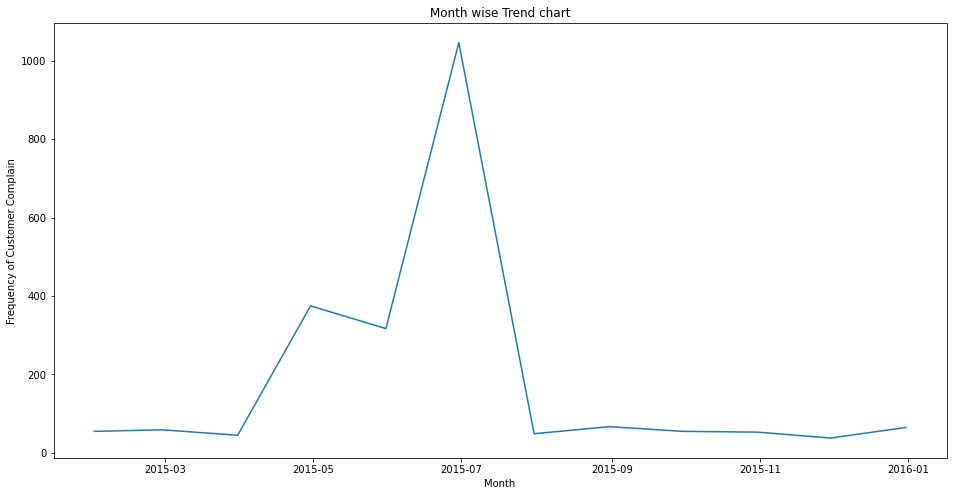

In [12]:
plt.figure(figsize=(16,8))
plt.plot(df['Customer Complaint'].resample('M').count())
plt.title('Month wise Trend chart')
plt.xlabel('Month')
plt.ylabel('Frequency of Customer Complain')

- As per monthly trend chart , we can see that complaints were increased in June and July 2015.

Text(0, 0.5, 'Frequency of Customer Complain')

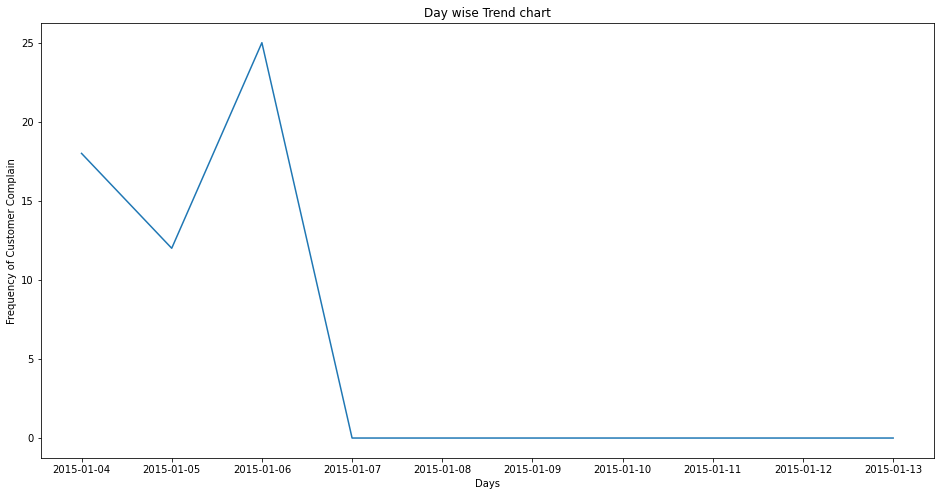

In [13]:
plt.figure(figsize=(16,8))
plt.plot(df['Customer Complaint'].resample('D').count().iloc[:10])
plt.title('Day wise Trend chart')
plt.xlabel('Days')
plt.ylabel('Frequency of Customer Complain')

#### > Provide a table with the frequency of complaint types.

In [15]:
df['Customer Complaint'].value_counts()

Comcast                                                                              83
Comcast Internet                                                                     18
Comcast Data Cap                                                                     17
comcast                                                                              13
Data Caps                                                                            11
                                                                                     ..
Comcast's Constant Manipulation of Bills                                              1
Horrible customer service; could not help me - lied to by supervisor                  1
COMCAST SERVICE                                                                       1
Comcast deceptive selling billing lack of service - SECOND And EXPANDED COMPLAINT     1
Improper Billing/Services                                                             1
Name: Customer Complaint, Length

Text(0, 0.5, 'Number of complaints')

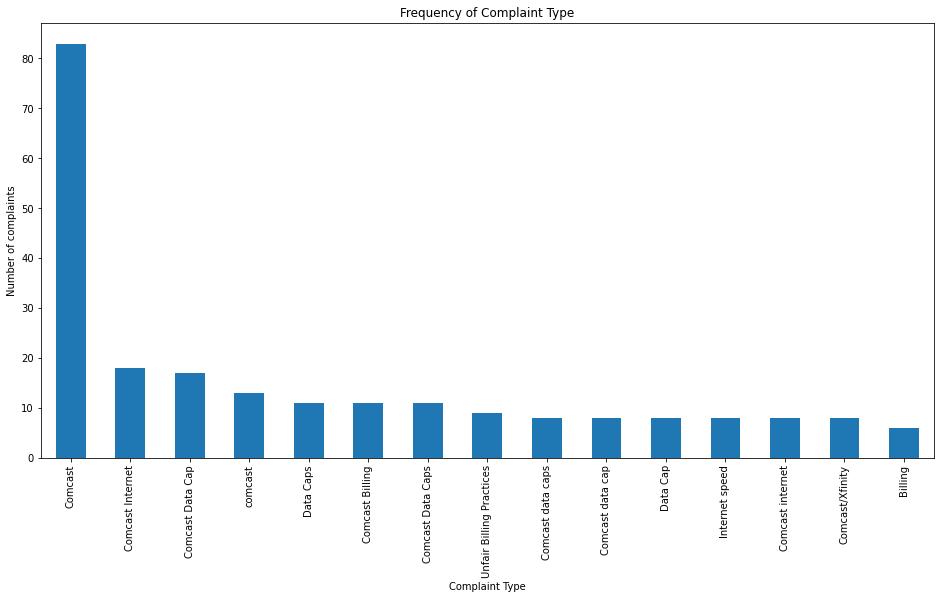

In [16]:
plt.figure(figsize=(16,8))
df['Customer Complaint'].value_counts().iloc[:15].plot.bar()
plt.title('Frequency of Complaint Type')
plt.xlabel('Complaint Type')
plt.ylabel('Number of complaints')

- we can see the above graph is showing the internet, data cap and billing are the most type of complaints.

####  > Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [18]:
import nltk

In [19]:
#!pip install wordcloud

- Creating a word cloud by checking the string of all the words in complaint type and removing the extra unuseful words.


In [20]:
from wordcloud import WordCloud, STOPWORDS
common_complaints = df['Customer Complaint'].dropna().tolist()
common_complaints =''.join(common_complaints).lower()

In [21]:
stop_word_set=set(STOPWORDS)

In [22]:
remove_list = ('Comcast','Now','Company','Day','Someone','Thing','Also','Got','Way','Call','Called','One','Said','Tell','will','regarding','new')

In [23]:
for words in remove_list:
    stop_word_set.add(words)

In [24]:
wordcloud = WordCloud(stopwords=stop_word_set,
                      background_color='white',
                      width=1200,
                      height=1000).generate(common_complaints)

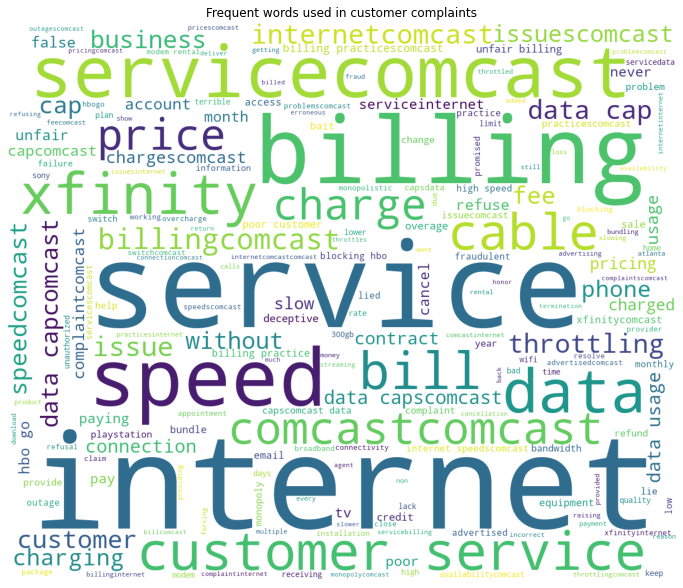

In [25]:
plt.figure( figsize=(12,18) )
plt.imshow(wordcloud)
plt.title('Frequent words used in customer complaints')
plt.axis('off')
plt.show()

- From wordcloud it is clear internet is the most common complaints.

#### > Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [27]:
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [28]:
df['newstatus']=['Open' if status=='Open' or status == 'Pending' else 'Closed' for status in df['Status']]

In [29]:
df.sample(10)

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,newstatus
Date_month_year,,,,,,,,,,,
2015-08-06,329414,Failure to show for an appointment and lying,06-08-15,7:37:53 PM,Internet,Wellington,Florida,33414,Open,No,Open
2015-06-18,350578,Comcast,18-06-15,8:42:27 PM,Customer Care Call,Jacksonville,Florida,32224,Solved,No,Closed
2015-06-25,366507,Problems with Comcast,25-06-15,5:20:34 PM,Customer Care Call,Lafayette,Indiana,47904,Solved,No,Closed
2015-06-16,342665,cannot access my email or service at all,16-06-15,9:51:17 AM,Customer Care Call,Gathersburg,Maryland,20877,Open,No,Open
2015-05-05,274956,Internet connection both upload and download s...,05-05-15,7:34:03 PM,Customer Care Call,Attica,Indiana,47918,Open,No,Open
2015-06-24,361151,Data caps and monthly fees,24-06-15,10:14:31 AM,Internet,Powell,Tennessee,37849,Solved,No,Closed
2015-05-16,293050,Poor internet connection/dropped connection si...,16-05-15,8:32:31 AM,Internet,Bensalem,Pennsylvania,19020,Solved,No,Closed
2015-04-16,240653,"comcast internet, telephone, TV service",16-04-15,10:13:04 PM,Customer Care Call,Miami,Florida,33133,Closed,No,Closed
2015-06-13,339008,Comcast Automatic Payments,13-06-15,1:07:49 PM,Internet,Detroit,Michigan,48205,Solved,No,Closed


#### > Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

In [31]:
state_complain=df.groupby(['State','newstatus']).size().unstack()

In [32]:
state_complain

newstatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,NaN


<AxesSubplot:xlabel='State'>

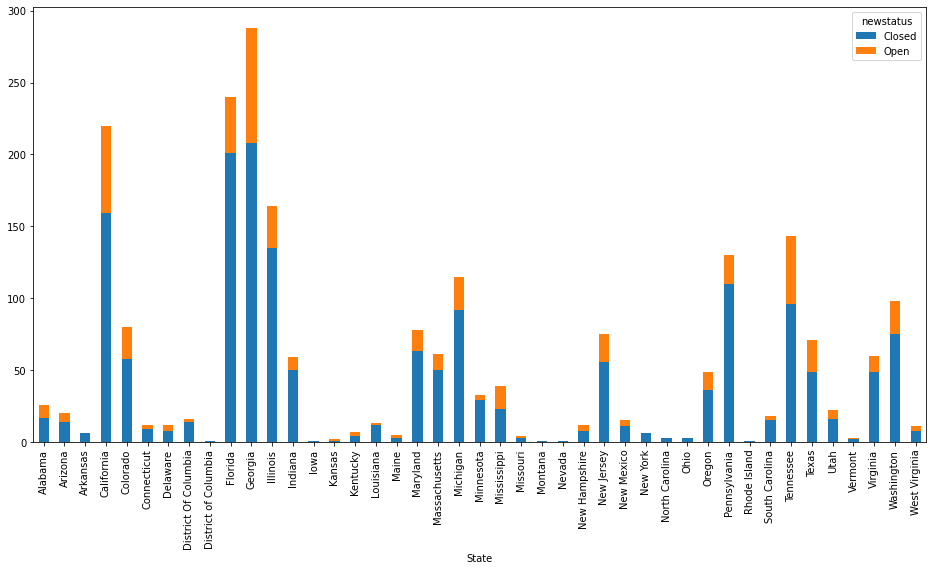

In [33]:
state_complain.plot.bar(figsize=(16,8),stacked=True)

#### > Which state has the maximum complaints

- As per stack bar chart it is clear that Georgia has the maximum number of complaint's.

In [35]:
df.groupby(['State']).size().sort_values(ascending=False)[:10]

State
Georgia         288
Florida         240
California      220
Illinois        164
Tennessee       143
Pennsylvania    130
Michigan        115
Washington       98
Colorado         80
Maryland         78
dtype: int64

#### > Which state has the highest percentage of unresolved complaints

In [37]:
df['newstatus'].value_counts()

Closed    1707
Open       517
Name: newstatus, dtype: int64

In [38]:
unresolved_data=df.groupby(['State','newstatus']).size().unstack().fillna(0).sort_values(by='Open',ascending=False)

In [39]:
unresolved_data

newstatus,Closed,Open
State,,
Georgia,208.0,80.0
California,159.0,61.0
Tennessee,96.0,47.0
Florida,201.0,39.0
Illinois,135.0,29.0
Washington,75.0,23.0
Michigan,92.0,23.0
Colorado,58.0,22.0
Texas,49.0,22.0


In [40]:
unresolved_data['unresloved_cmp_prec']=unresolved_data['Open']/unresolved_data['Open'].sum()*100

In [41]:
unresolved_data

newstatus,Closed,Open,unresloved_cmp_prec
State,,,
Georgia,208.0,80.0,15.473888
California,159.0,61.0,11.798839
Tennessee,96.0,47.0,9.090909
Florida,201.0,39.0,7.543520
Illinois,135.0,29.0,5.609284
Washington,75.0,23.0,4.448743
Michigan,92.0,23.0,4.448743
Colorado,58.0,22.0,4.255319
Texas,49.0,22.0,4.255319


- Georgia has the maximum 15.47% of unresolved complaint's.

#### > Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [43]:
resolved_data=df.groupby(['Received Via','newstatus']).size().unstack().fillna(0)

In [44]:
resolved_data['resolved']=resolved_data['Closed']/resolved_data['Closed'].sum()*100

In [45]:
resolved_data['resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64

-  Here we can see the above output of Customer care call and Internet is respectively 50.6% and 49.4%.
